In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load Dataset
df = pd.read_csv("EV_India.csv")
print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
   Sr. No.                State Name Total Electric Vehicle  \
0        1  Andaman & Nicobar Island                    162   
1        2             Andra Pradesh                    NaN   
2        3         Arunachal Pradesh                     20   
3        4                     Assam                  64766   
4        5                     Bihar                  83335   

  Total Non-Electric Vehicle        Total  
0                   1,46,945     1,47,107  
1                        NaN          NaN  
2                   2,52,965     2,52,985  
3                  46,77,053    47,41,819  
4                1,04,07,078  1,04,90,413  


In [3]:
# Data Cleaning
print("Checking for missing values...")
print(df.isnull().sum())

Checking for missing values...
Sr. No.                       0
State Name                    0
Total Electric Vehicle        4
Total Non-Electric Vehicle    4
Total                         4
dtype: int64


In [4]:
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill missing numerical values with median

In [5]:
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode

In [6]:
# Encoding Categorical Features
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [7]:
# Feature Selection (Select only numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns
X = df[numeric_columns]

In [8]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Data Summary
print(df.describe())

         Sr. No.  State Name  Total Electric Vehicle  \
count  36.000000   36.000000               36.000000   
mean   18.500000   17.500000               14.305556   
std    10.535654   10.535654                8.598403   
min     1.000000    0.000000                0.000000   
25%     9.750000    8.750000                8.750000   
50%    18.500000   17.500000               12.500000   
75%    27.250000   26.250000               21.250000   
max    36.000000   35.000000               30.000000   

       Total Non-Electric Vehicle      Total  
count                   36.000000  36.000000  
mean                    13.777778  13.777778  
std                     10.116778  10.116778  
min                      0.000000   0.000000  
25%                      4.750000   4.750000  
50%                     13.500000  13.500000  
75%                     22.250000  22.250000  
max                     31.000000  31.000000  


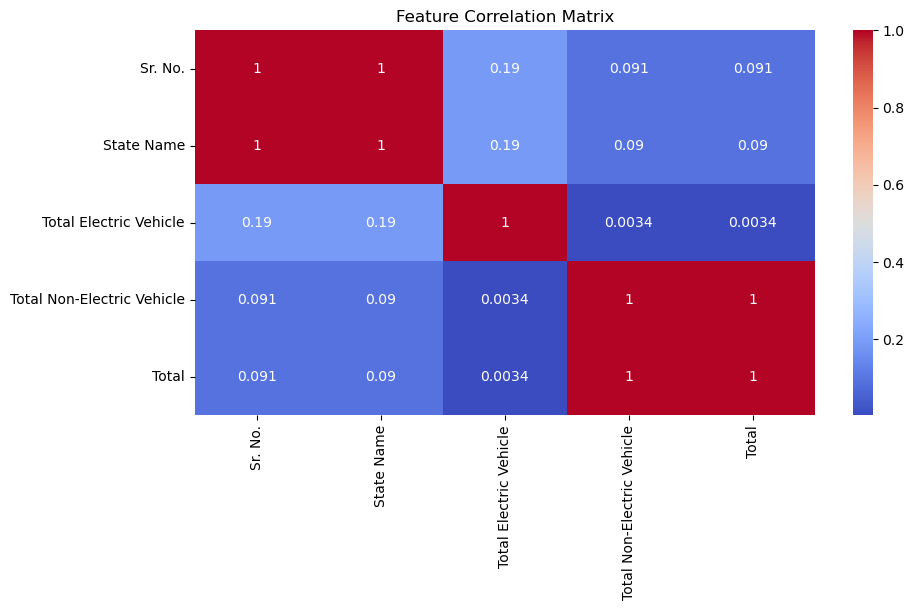

In [10]:
# Data Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

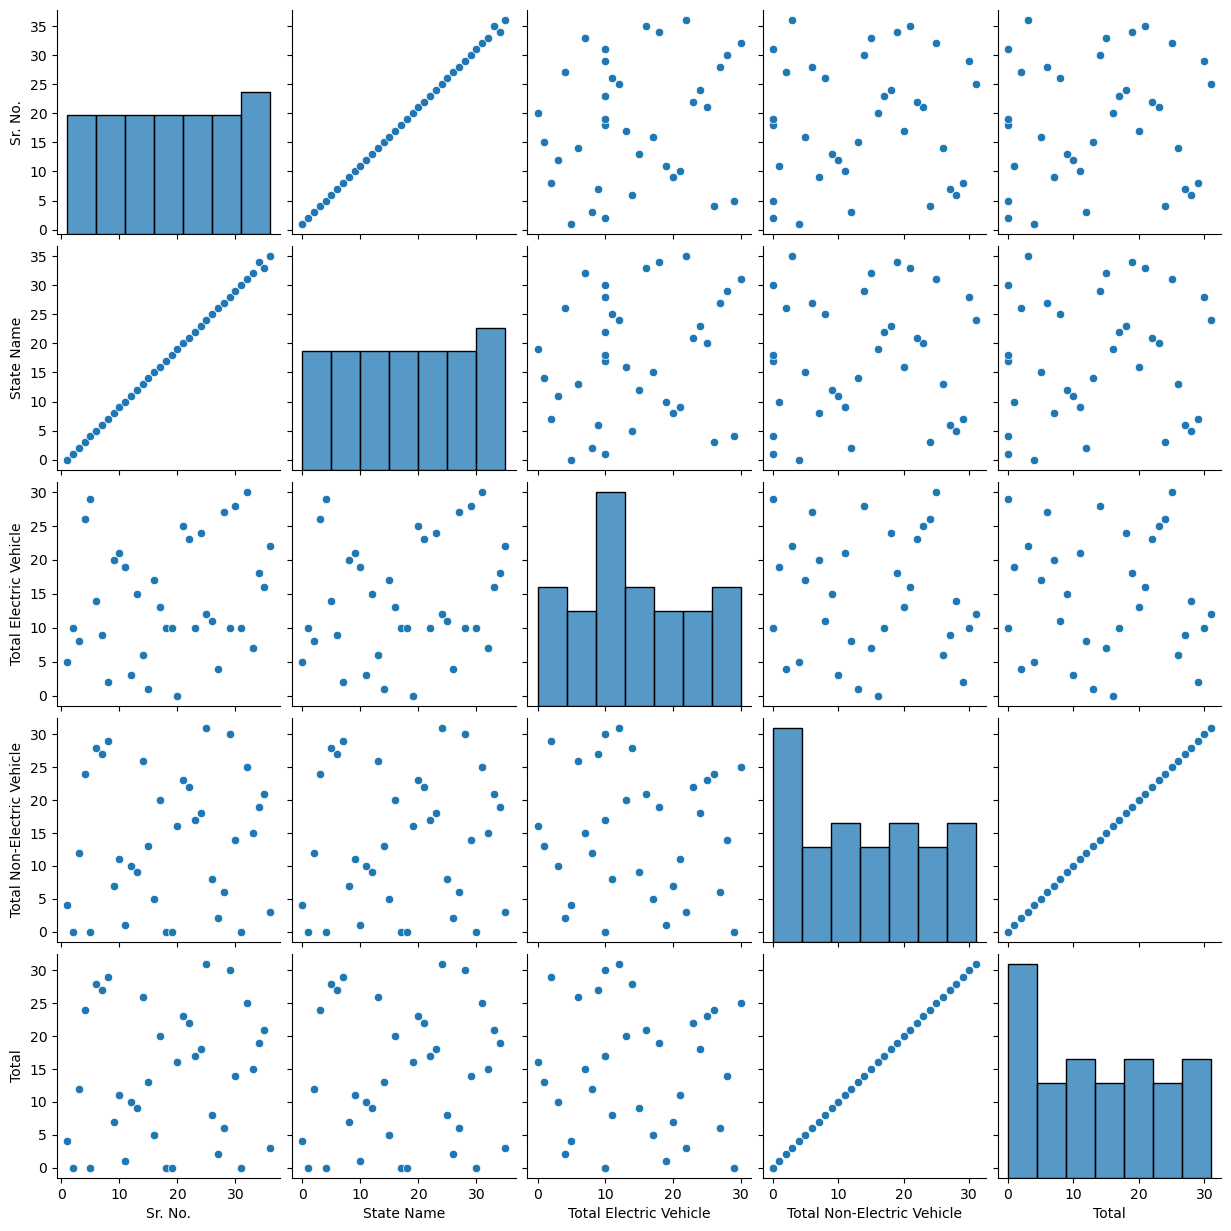

In [18]:
# Pairplot for numerical features
sns.pairplot(df[numeric_columns])
plt.show()

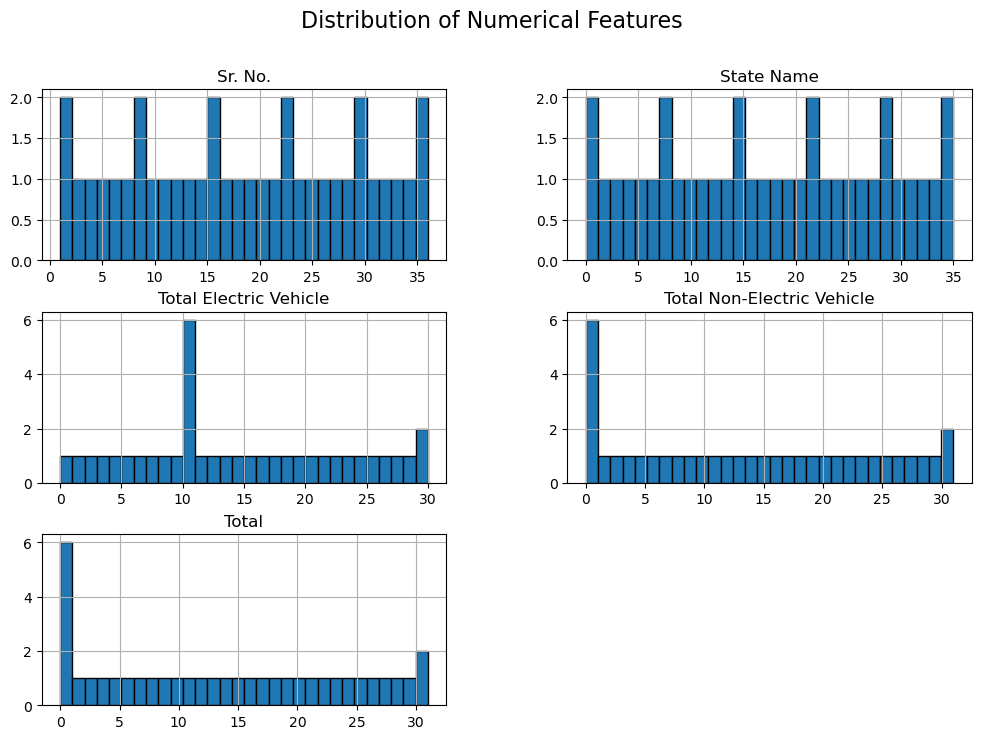

In [19]:
# Histogram of numerical features
df[numeric_columns].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

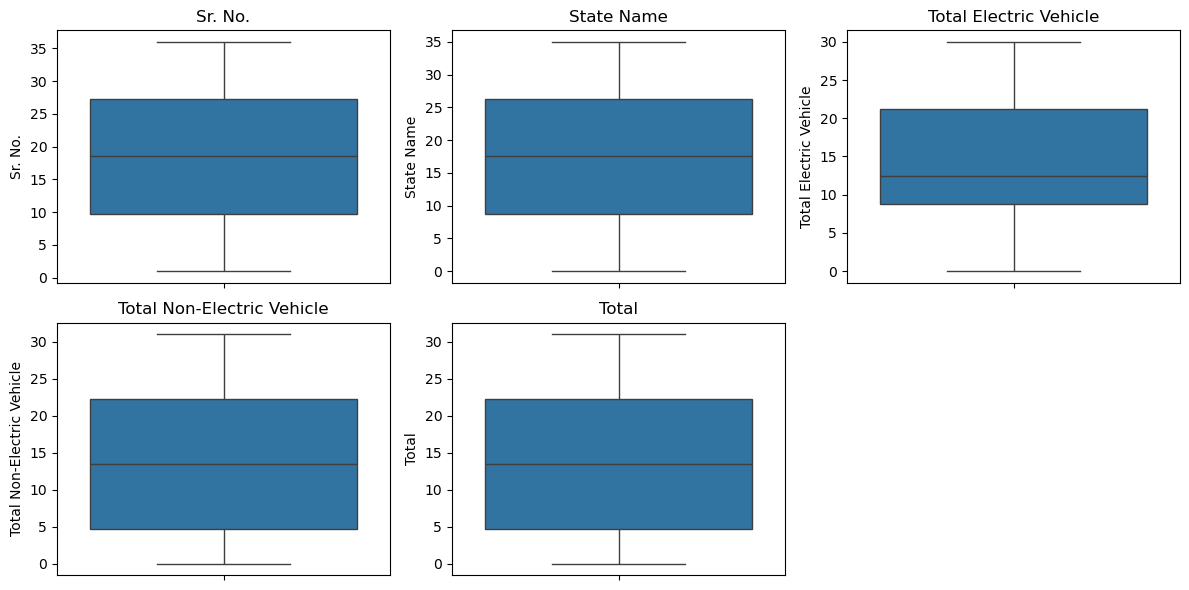

In [20]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns)//2 + 1, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
# K-Means Clustering
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

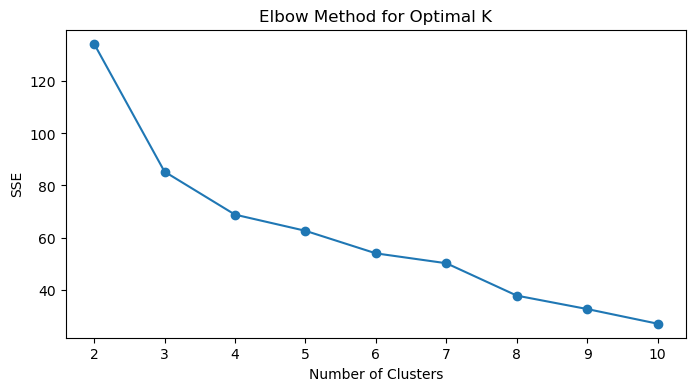

In [12]:
# Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

In [13]:
# Choosing optimal K and fitting model
optimal_k = 4  # Adjust based on Elbow Method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2894862857013831


In [15]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

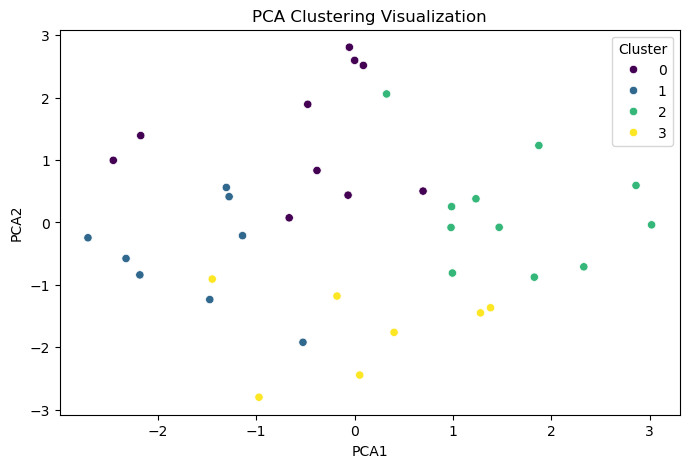

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('PCA Clustering Visualization')
plt.show()

In [17]:
# Conclusion
print("Clustering analysis completed successfully.")

Clustering analysis completed successfully.
